In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2

In [ ]:
!unzip//content/Flowers-Dataset.zip

/bin/bash: unzip/content/Flowers-Dataset.zip: No such file or directory


In [ ]:
img=cv2.imread('/content/118974357_0faa23cce9_n.jpg')
img

array([[[  3,  42,  26],
        [  9,  48,  32],
        [ 12,  51,  36],
        ...,
        [ 37,  61,  61],
        [ 36,  67,  66],
        [ 50,  84,  84]],

       [[  5,  44,  28],
        [  9,  48,  32],
        [ 11,  50,  35],
        ...,
        [ 37,  58,  59],
        [ 38,  66,  66],
        [ 52,  86,  85]],

       [[ 10,  49,  33],
        [ 12,  51,  36],
        [ 10,  51,  36],
        ...,
        [ 36,  57,  58],
        [ 43,  69,  69],
        [ 55,  87,  86]],

       ...,

       [[ 15,  74, 106],
        [  0,  34,  57],
        [  8,  42,  58],
        ...,
        [  1,  10,  30],
        [  6,  22,  39],
        [  1,  16,  32]],

       [[ 19,  83, 118],
        [  0,  36,  57],
        [  6,  45,  54],
        ...,
        [  5,  18,  40],
        [ 10,  21,  41],
        [  4,  22,  39]],

       [[  6,  90, 116],
        [  4,  44,  69],
        [  0,  42,  55],
        ...,
        [  7,  23,  40],
        [ 14,  18,  42],
        [  4,  19,  45]]

In [ ]:
import matplotlib.pyplot as plt

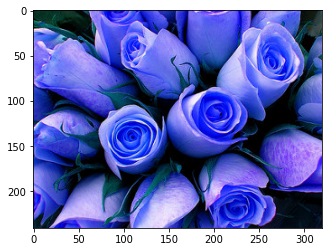

In [ ]:
plt.imshow(img)

In [ ]:
import numpy as np

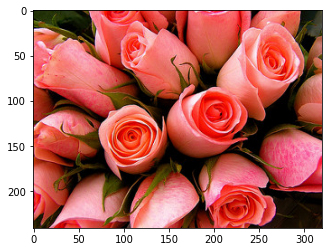

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

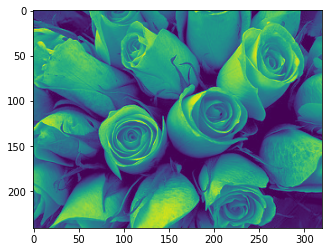

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))

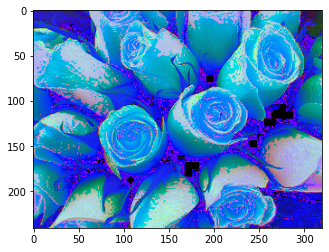

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2HLS))

**IMAGE RESIZE**

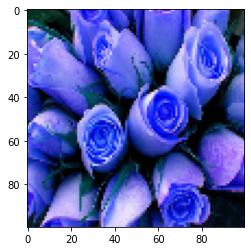

In [ ]:
plt.imshow(cv2.resize(img,(100,100)))

In [ ]:
rs = cv2.resize(img,(100,100))
print(img.shape)
print(rs.shape)

(241, 320, 3)
(100, 100, 3)


**IMAGE ROTATE**

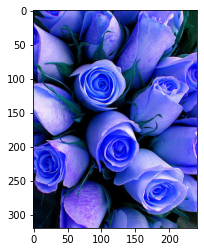

In [ ]:
plt.imshow(cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE))

**IMAGE CROP**

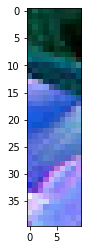

In [ ]:
plt.imshow(img[10:50,20:30])

**IMAGE BLUR**

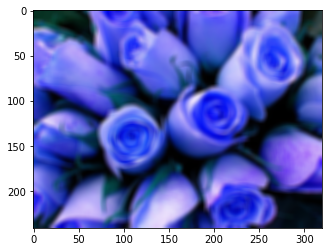

In [ ]:
x=cv2.GaussianBlur(img,(7,7),cv2.BORDER_DEFAULT)
plt.imshow(x)

In [ ]:
cv2.imwrite('image.jpg',img)

True

**IMAGE AUGMENTATION**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=train_datagen.flow_from_directory(r"/content/drive",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 2 images belonging to 4 classes.


In [ ]:
x_test=test_datagen.flow_from_directory(r"/content/drive",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 2 images belonging to 4 classes.


In [ ]:
x_train.class_indices

{'.Trash-0': 0,
 '.file-revisions-by-id': 1,
 '.shortcut-targets-by-id': 2,
 'MyDrive': 3}

**INITIALIZING CNN AND CREATE MODEL**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

**ADD LAYERS**

In [ ]:
model=Sequential()

**INPUT LAYERS(CONVOLUTION,MAXPOOLING,FLATTEN)**

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


**HIDDEN LAYERS**

In [ ]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

**OUTPUT LAYERS**

In [ ]:
model.add(Dense(5,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
len(x_train)

1

**SAVE THE MODEL**

In [ ]:
model.save('Flowers_classification_model1.h5')

**TEST THE MODEL**

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
# Load the model
model=load_model('Flowers_classification_model1.h5')

In [ ]:
img=image.load_img(r"/content/118974357_0faa23cce9_n.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
# x_train.class_indices
index=['daisy','dandelion','rose','sunflower','tulip']
index[y[0]]

1/1 [==============================] - 0s 104ms/step


'dandelion'